#  Final Codebase

In [ ]:
!pip install numpy==1.23.5 matplotlib==3.6.3 -q
!pip install basemap==1.3.6 -q

In [ ]:
# !pip install netCDF4 -q
# !pip install Basemap -q
# !pip install mpl_tools -q

# !pip install --upgrade --force-reinstall numpy scipy
!pip install numpy==1.23.5 scipy==1.10.1 matplotlib netCDF4 basemap

import datetime
from datetime import timedelta, datetime
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from scipy import optimize

## Read the dataset netcdf file (monthly SLA) and get variables

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from netCDF4 import Dataset
dataset = Dataset('/content/drive/MyDrive/ALL_MONTHLY_SLA_1993_2022.nc')
print(dataset.variables.keys())

dict_keys(['longitude', 'longitude_bnds', 'latitude', 'latitude_bnds', 'time', 'time_bnds', 'sla'])


In [ ]:
time  = dataset['time'][:]
lon_o = dataset['longitude'][:]
lat_o = dataset['latitude'][:]
sla   = 1000*dataset['sla'][:] # Sea Level Anaomaly in mm

# print(time)

### Print the variable shapes

In [ ]:
print('Shape of lon : ', np.shape(lon_o))
print('Shape of lat : ', np.shape(lat_o))
print('Shape of sla : ', np.shape(sla))
print('Shape of time: ', np.shape(time))

print('Min lon : ', np.min(lon_o))
print('Max lon : ', np.max(lon_o))
print('Min lat : ', np.min(lat_o))
print('Max lat : ', np.max(lat_o))

NameError: name 'np' is not defined

### Create a 2-D grid of lon,lat for 1-D lon, lat

In [ ]:
lon, lat = np.meshgrid(lon_o, lat_o)
print('Shape of meshgrid: ', np.shape(lon))

Shape of meshgrid:  (720, 1440)


In [ ]:
# print(dataset.variables['time'].units)
# days since 1950-1-1 00:00:00

######
epoch     = datetime(1950, 1, 1)
time_sla  = [ epoch + timedelta(days=t) for t in time ]
base_year = 1950.0
time_year = [  (timedelta(days=t).total_seconds() )/86400.0/365.25 + base_year  for t in time ]
#####

time_year = np.array(time_year) # variable with year format in this variable
#print(time_year)
time_str = ( [ datetime.strftime(t,'%Y-%m') for t in time_sla ] ) # String format for time variable

# Print the time with index numbers
for index, value in enumerate(time_str):
   print(f"('{index}')<= {value}")

# print(time_year)


('0')<= 1993-01
('1')<= 1993-02
('2')<= 1993-03
('3')<= 1993-04
('4')<= 1993-05
('5')<= 1993-06
('6')<= 1993-07
('7')<= 1993-08
('8')<= 1993-09
('9')<= 1993-10
('10')<= 1993-11
('11')<= 1993-12
('12')<= 1994-01
('13')<= 1994-02
('14')<= 1994-03
('15')<= 1994-04
('16')<= 1994-05
('17')<= 1994-06
('18')<= 1994-07
('19')<= 1994-08
('20')<= 1994-09
('21')<= 1994-10
('22')<= 1994-11
('23')<= 1994-12
('24')<= 1995-01
('25')<= 1995-02
('26')<= 1995-03
('27')<= 1995-04
('28')<= 1995-05
('29')<= 1995-06
('30')<= 1995-07
('31')<= 1995-08
('32')<= 1995-09
('33')<= 1995-10
('34')<= 1995-11
('35')<= 1995-12
('36')<= 1996-01
('37')<= 1996-02
('38')<= 1996-03
('39')<= 1996-04
('40')<= 1996-05
('41')<= 1996-06
('42')<= 1996-07
('43')<= 1996-08
('44')<= 1996-09
('45')<= 1996-10
('46')<= 1996-11
('47')<= 1996-12
('48')<= 1997-01
('49')<= 1997-02
('50')<= 1997-03
('51')<= 1997-04
('52')<= 1997-05
('53')<= 1997-06
('54')<= 1997-07
('55')<= 1997-08
('56')<= 1997-09
('57')<= 1997-10
('58')<= 1997-11
('59')<

## Plotting 6-Yearly SLA Plots

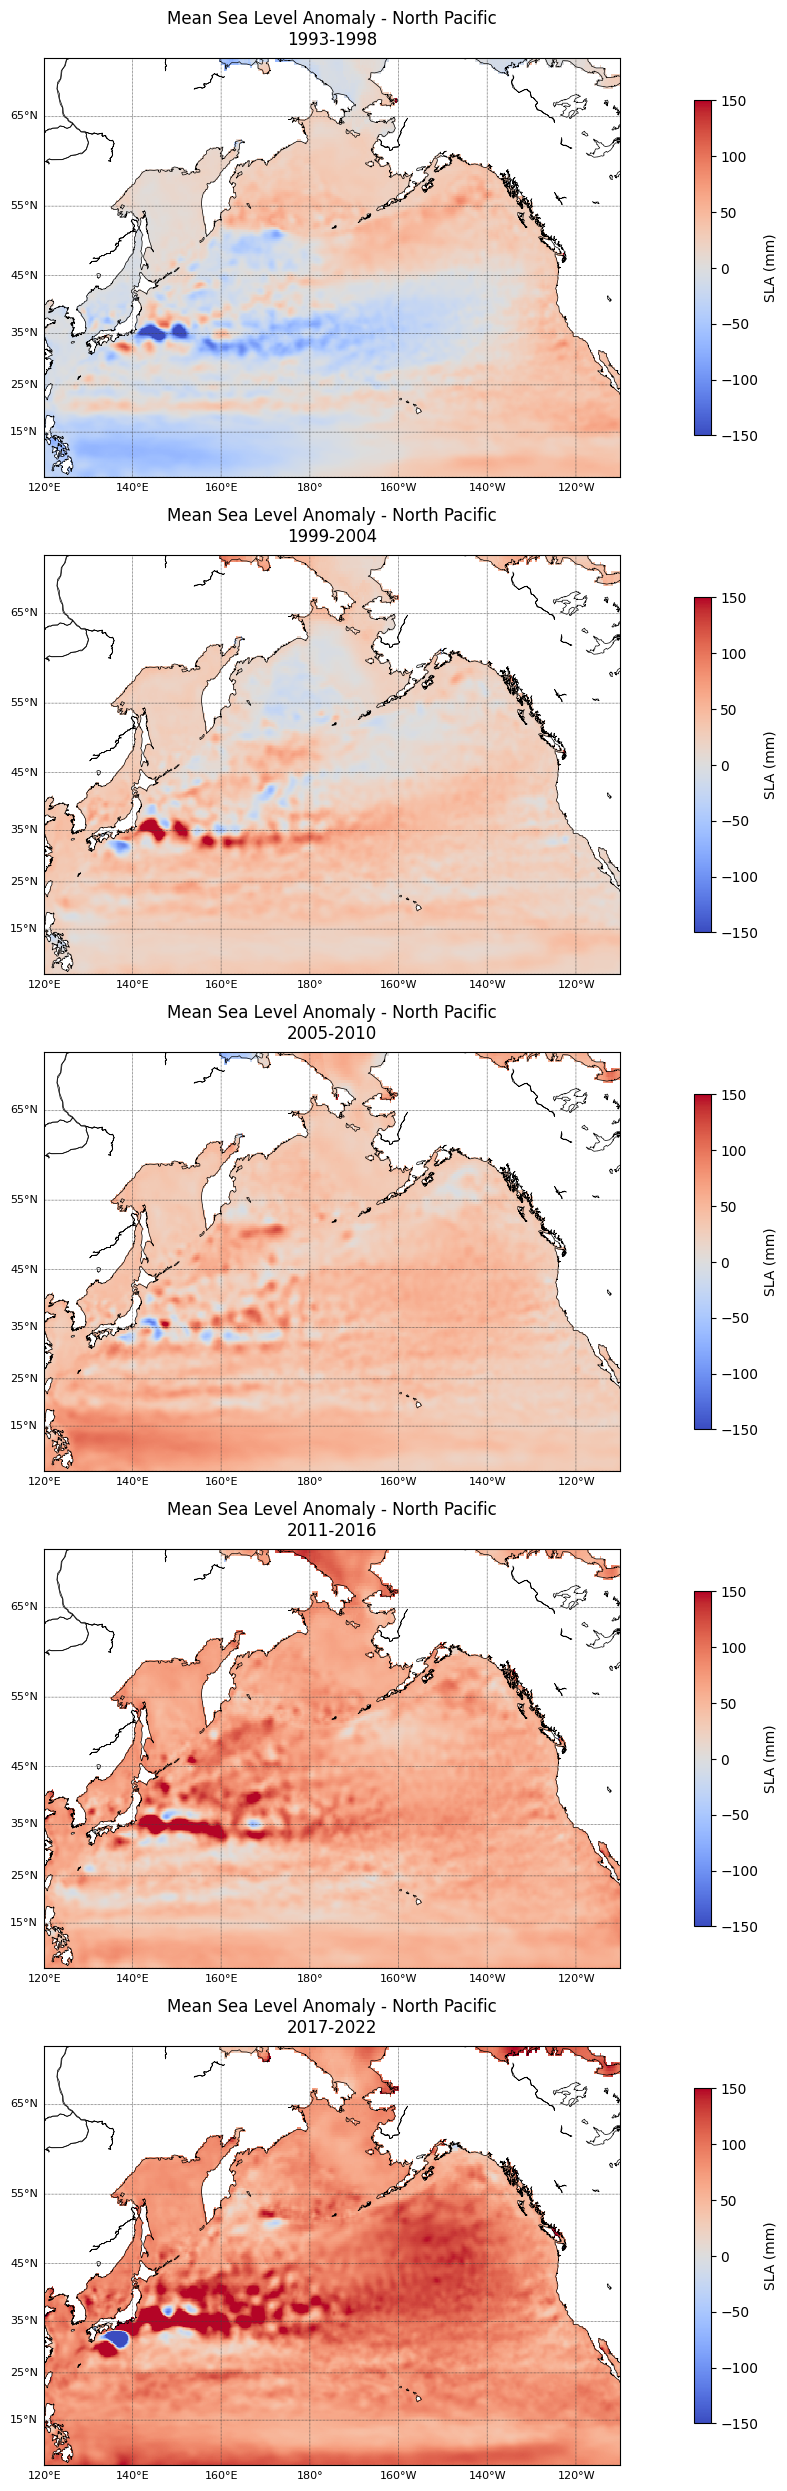

In [ ]:
# Define North Pacific domain
domain = [120.0, 250.0, 5.0, 70.0]  # [lon_min, lon_max, lat_min, lat_max]

# Create 6-year blocks (5 plots total)
year_blocks = [
    (1993, 1998),
    (1999, 2004),
    (2005, 2010),
    (2011, 2016),
    (2017, 2022)
]

# Create a figure with 5 subplots
fig, axes = plt.subplots(5, 1, figsize=(15, 25))

for i, (start_year, end_year) in enumerate(year_blocks):
    # Create mask for this period
    time_mask = [(datetime.strptime(t, '%Y-%m').year >= start_year) &
                 (datetime.strptime(t, '%Y-%m').year <= end_year)
                 for t in time_str]

    # Calculate mean SLA over this 6-year period
    period_sla_mean = np.nanmean(sla[time_mask, :, :], axis=0)

    # Initialize Basemap for this subplot
    ax = axes[i]
    m = Basemap(
        projection='merc',
        llcrnrlon=domain[0], urcrnrlon=domain[1],
        llcrnrlat=domain[2], urcrnrlat=domain[3],
        resolution='l',
        ax=ax
    )

    # Draw coastlines, parallels, and meridians
    m.drawcoastlines(linewidth=0.5)
    m.drawparallels(
        np.arange(5, 71, 10),
        labels=[1, 0, 0, 0],
        color='0.25',
        linewidth=0.5,
        fontsize=8
    )
    m.drawmeridians(
        np.arange(120, 251, 20),
        labels=[0, 0, 0, 1],
        color='0.25',
        linewidth=0.5,
        fontsize=8
    )

    # Transform lon/lat to map coordinates
    lon_map, lat_map = m(lon, lat)

    # Plot 6-year mean SLA
    sla_plot = m.pcolormesh(
        lon_map, lat_map,
        period_sla_mean,
        vmin=-150, vmax=150,  # Consistent scale across plots
        cmap='coolwarm',      # Better for anomalies than 'jet'
        shading='auto'
    )

    # Add colorbar to each subplot
    cbar = fig.colorbar(sla_plot, ax=ax, shrink=0.8)
    cbar.set_label('SLA (mm)', fontsize=10)

    # Add title with period
    ax.set_title(f'Mean Sea Level Anomaly - North Pacific\n{start_year}-{end_year}',
                fontsize=12, pad=10)

plt.tight_layout()
plt.savefig('SLA_6year_means_North_Pacific.jpg', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Define North Pacific domain
domain = [0, 360.0, 0.0, 360.0]  # [lon_min, lon_max, lat_min, lat_max]

# Create 6-year blocks (5 plots total)
year_blocks = [
    (1993, 1998),
    (1999, 2004),
    (2005, 2010),
    (2011, 2016),
    (2017, 2022)
]

# Create a figure with 5 subplots
fig, axes = plt.subplots(5, 1, figsize=(15, 25))

for i, (start_year, end_year) in enumerate(year_blocks):
    # Create mask for this period
    time_mask = [(datetime.strptime(t, '%Y-%m').year >= start_year) &
                 (datetime.strptime(t, '%Y-%m').year <= end_year)
                 for t in time_str]

    # Calculate mean SLA over this 6-year period
    period_sla_mean = np.nanmean(sla[time_mask, :, :], axis=0)

    # Initialize Basemap for this subplot
    ax = axes[i]
    m = Basemap(
        projection='merc',
        llcrnrlon=domain[0], urcrnrlon=domain[1],
        llcrnrlat=domain[2], urcrnrlat=domain[3],
        resolution='l',
        ax=ax
    )

    # Draw coastlines, parallels, and meridians
    m.drawcoastlines(linewidth=0.5)
    m.drawparallels(
        np.arange(5, 71, 10),
        labels=[1, 0, 0, 0],
        color='0.25',
        linewidth=0.5,
        fontsize=8
    )
    m.drawmeridians(
        np.arange(120, 251, 20),
        labels=[0, 0, 0, 1],
        color='0.25',
        linewidth=0.5,
        fontsize=8
    )

    # Transform lon/lat to map coordinates
    lon_map, lat_map = m(lon, lat)

    # Plot 6-year mean SLA
    sla_plot = m.pcolormesh(
        lon_map, lat_map,
        period_sla_mean,
        vmin=-150, vmax=150,  # Consistent scale across plots
        cmap='coolwarm',      # Better for anomalies than 'jet'
        shading='auto'
    )

    # Add colorbar to each subplot
    cbar = fig.colorbar(sla_plot, ax=ax, shrink=0.8)
    cbar.set_label('SLA (mm)', fontsize=10)

    # Add title with period
    ax.set_title(f'Mean Sea Level Anomaly - North Pacific\n{start_year}-{end_year}',
                fontsize=12, pad=10)

plt.tight_layout()
plt.savefig('SLA_6year_means_North_Pacific.jpg', dpi=300, bbox_inches='tight')
plt.show()

## Global : To get a single timeseries

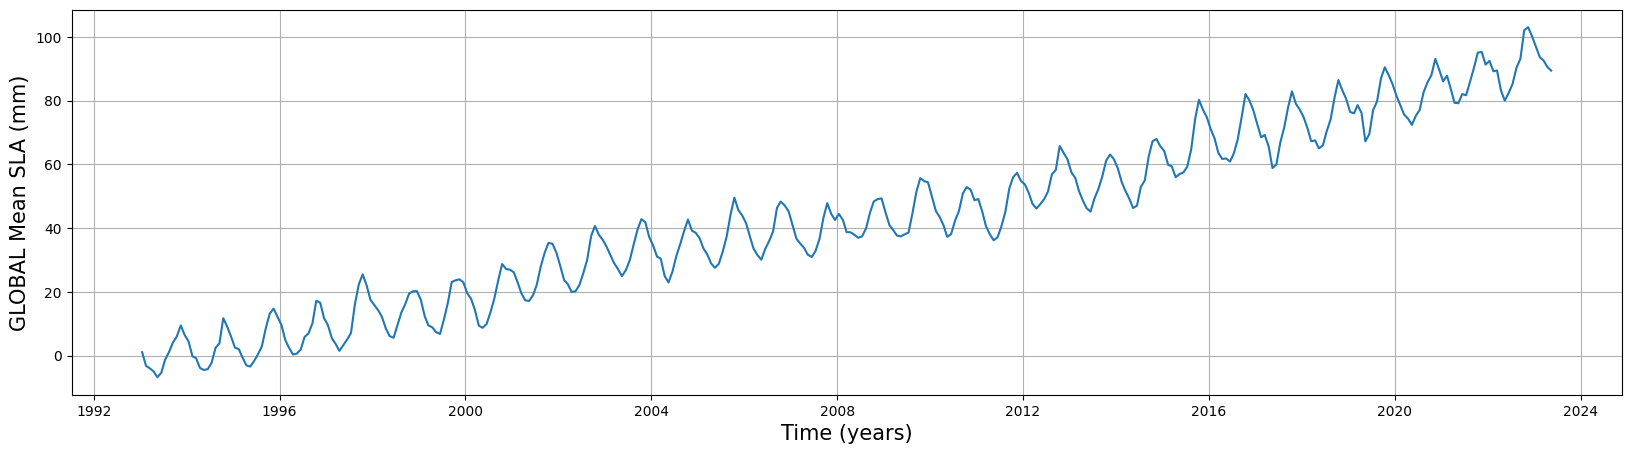

In [ ]:
global_sla=np.mean( sla,axis=(1,2) )

fig, ax =plt.subplots(figsize=(20,5))
plt.plot( time_sla, global_sla )
plt.xlabel('Time (years)',fontsize=15)
plt.ylabel('GLOBAL Mean SLA (mm)',fontsize=15)
plt.grid('on')
plt.show()

## GLOBAL : Fit a line  to this data using scipy-optimze-curve_fit

[7.86342919e+01 3.91561759e-02]
SLOPE = 3.039765271029358


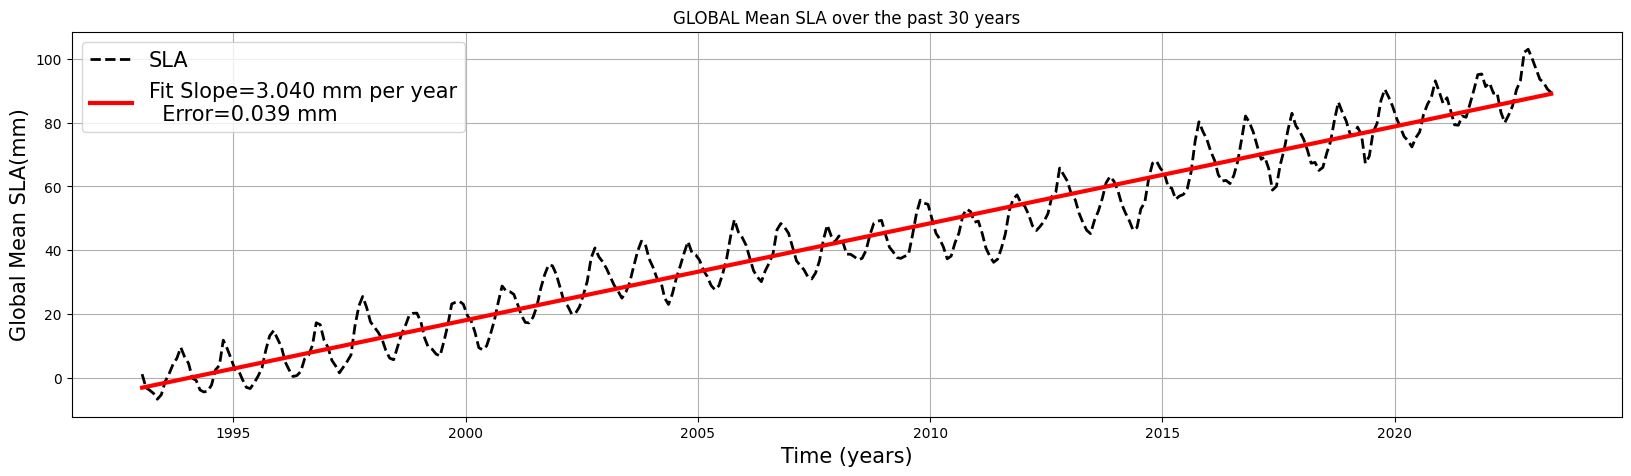

In [ ]:
######################################
# Linear-Fit
# define a line function
def func(x,a,b):
 return b*x + a

# plot x and y
x = time_year
y = global_sla


params, pcov = optimize.curve_fit( func, x, y )
err = np.sqrt(np.diag(pcov))
# print the errors
print(err)

[a,b] = params
# print the slopes
print('SLOPE =',b)

# get the fitted line
fit_y =  b*x + a


fig=plt.figure(figsize=(20,5))
plt.plot( x, y, 'k--', linewidth=2  )
plt.plot( x, fit_y, linewidth=3, color='r' )
plt.ylabel('Global Mean SLA(mm)', fontsize=15)
plt.xlabel('Time (years)', fontsize=15)
plt.legend([ 'SLA', 'Fit Slope='+'%5.3f mm per year'%(b)+'\n  Error='+ '%5.3f mm'%(err[1]) ], fontsize=15)
plt.title('GLOBAL Mean SLA over the past 30 years')
plt.grid('on')
plt.savefig('SL_RISE_GLOB.jpg')
plt.show()



## REGIONAL : To get a single timeseries

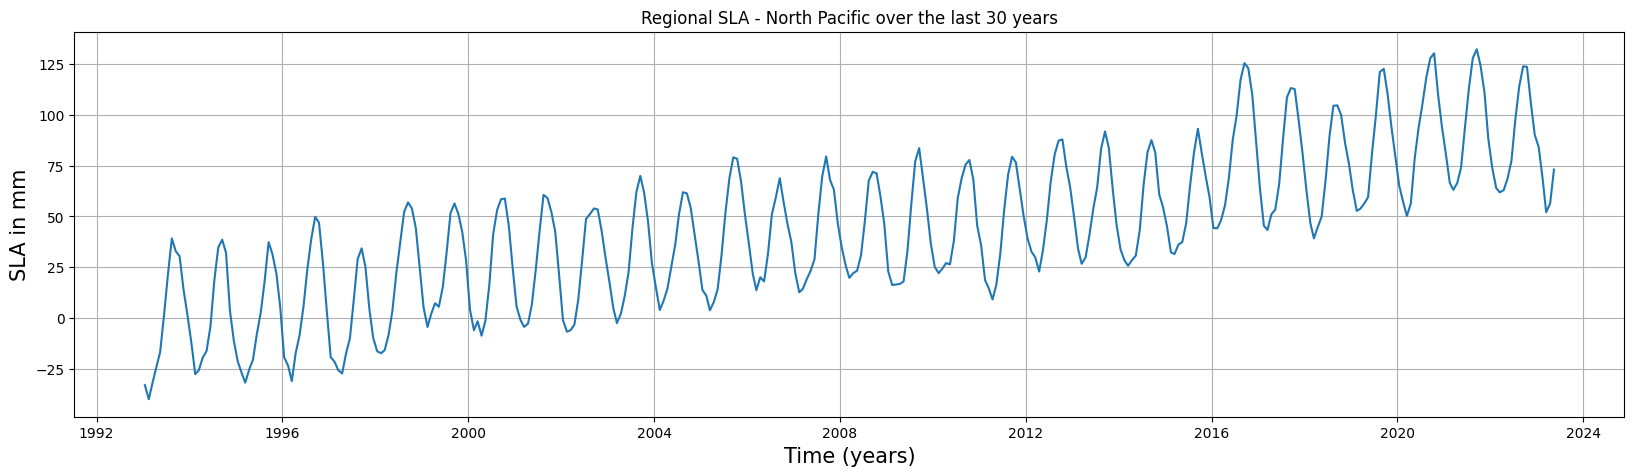

In [ ]:
domain = [120.0, 250.0, 5.0, 70.0] #lon min, lon max, lat min, lat max

# index of the lon
ind_start_lon = np.argmin( np.abs(domain[0]-lon_o))
ind_end_lon   = np.argmin( np.abs(domain[1]-lon_o))

ind_start_lat = np.argmin( np.abs(domain[2]-lat_o))
ind_end_lat   = np.argmin( np.abs(domain[3]-lat_o))


sla_region = sla[:, ind_start_lat:ind_end_lat+1, ind_start_lon:ind_end_lon+1  ]
lon_region = lon[ind_start_lat:ind_end_lat+1, ind_start_lon:ind_end_lon+1]
lat_region = lat[ind_start_lat:ind_end_lat+1, ind_start_lon:ind_end_lon+1]

# Doing the mean of SLA in the region
region_sla=np.mean( sla_region,axis=(1,2) )

fig, ax = plt.subplots(figsize=(20,5))
plt.plot( time_sla, region_sla )
plt.ylabel('SLA in mm', fontsize=15)
plt.xlabel('Time (years)', fontsize=15)
plt.title('Regional SLA - North Pacific over the last 30 years')
plt.grid('on')
plt.show()

## REGIONAL : Fit the line

[2.89653550e+02 1.44233835e-01]
SLOPE = 3.1890125745990825


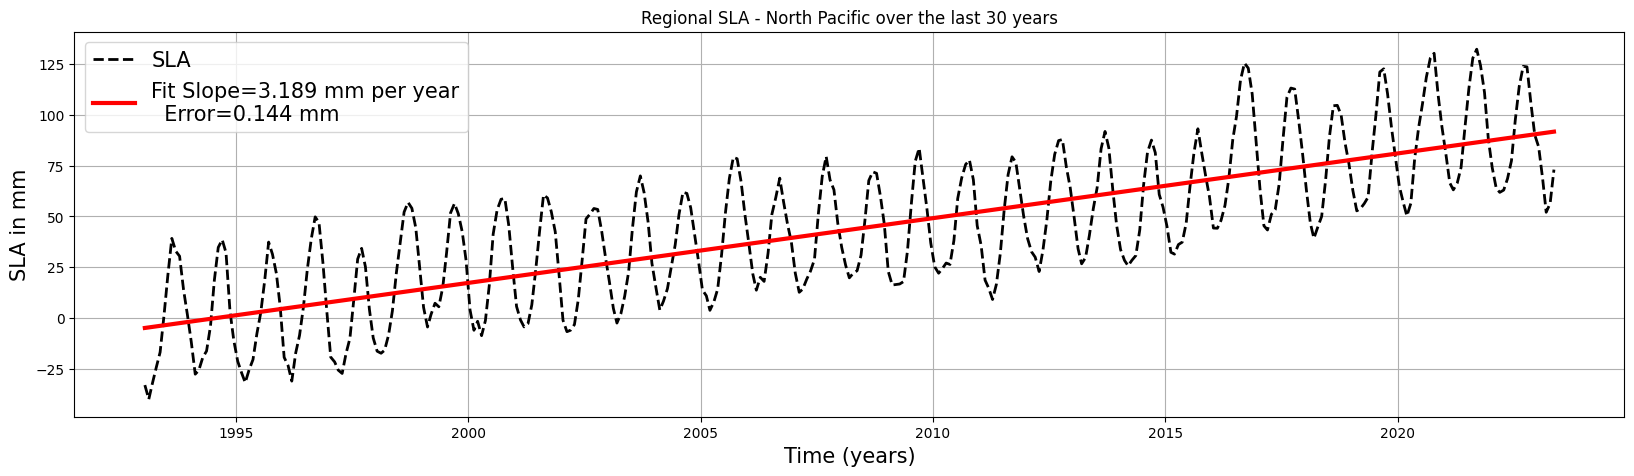

In [ ]:
# Assign x and y
x = time_year
y = region_sla

params, pcov = optimize.curve_fit( func, x, y )
err = np.sqrt(np.diag(pcov))
print(err)

[a,b] = params

fit_y =  b*x + a

print('SLOPE =',b)
fig=plt.figure(figsize=(20,5))
plt.plot( x, y, 'k--', linewidth=2 )
plt.plot( x, fit_y, linewidth=3, color='r')
plt.ylabel('SLA in mm', fontsize=15)
plt.xlabel('Time (years)', fontsize=15)
plt.legend([ 'SLA', 'Fit Slope='+'%5.3f mm per year'%(b)+'\n  Error='+ '%5.3f mm'%(err[1]) ], fontsize=15)
plt.title('Regional SLA - North Pacific over the last 30 years')
plt.grid('on')
plt.savefig('SL_RISE_BOB.jpg')
plt.show()

## Plotting SLA 'Timeseries' at a particular lon, lat (Useful for Cities)

819 435


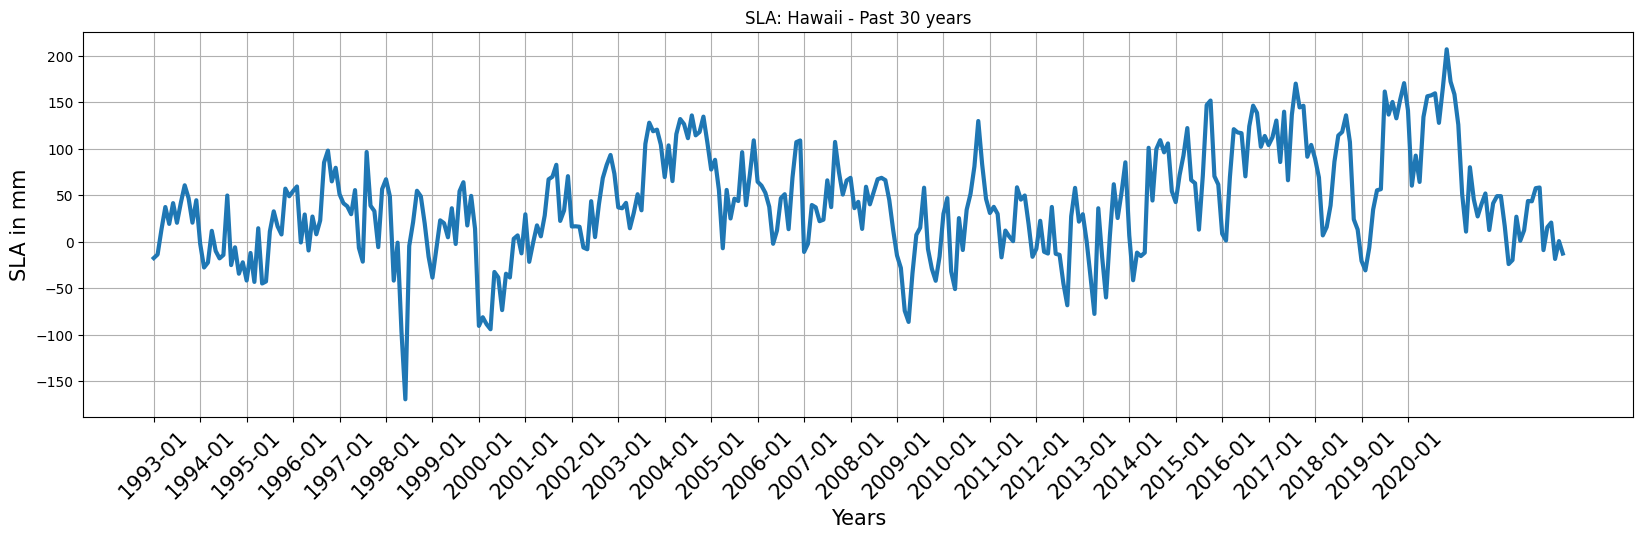

In [ ]:
point=[205,19] #City-Hawaii
## Find the index of the point in data
# index of the lon
ind_lon = np.argmin( np.abs(point[0] - lon_o) )

# index of lat
ind_lat = np.argmin( np.abs(point[1] - lat_o) )

print(ind_lon, ind_lat)

# Extract the time series at the point
sla_point = sla[:,ind_lat, ind_lon]

# Plot the time series
fig=plt.figure(figsize=(20,5))
plt.plot(time_str, sla_point, linewidth=3)
plt.ylabel('SLA in mm',fontsize=15)
plt.xlabel('Years',fontsize=15)
xdates=[ datetime(1993,1,1) + timedelta(days=365.25*t) for t in range(0,28)]
xlabels = ( [ datetime.strftime(t,'%Y-%m') for t in xdates ] )
#print(xlabels)
plt.title('SLA: Hawaii - Past 30 years')
plt.xticks(xlabels,rotation=45,fontsize=15)
plt.grid('on')
plt.show()

819 435
204.875 108.875
[6.37344938e+02 3.17367778e-01]
SLOPE = 2.203900018633514


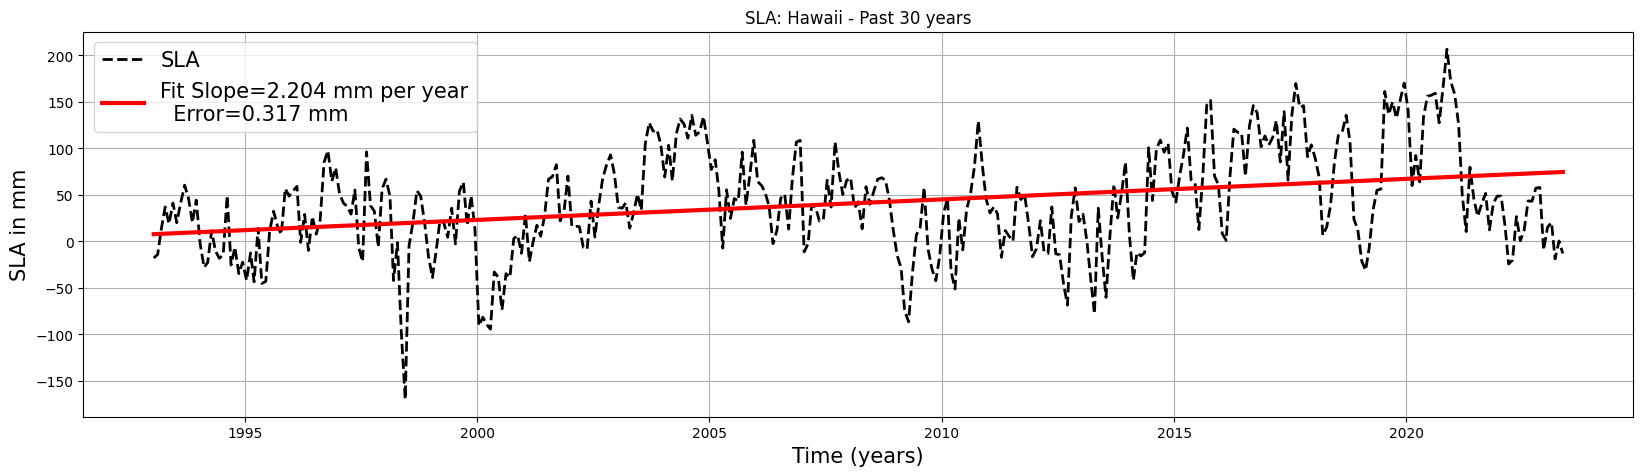

In [ ]:
point=[205, 19]
# index of the lon
ind_lon = np.argmin( np.abs(point[0]-lon_o) )

# index of lat
ind_lat = np.argmin( np.abs(point[1]-lat_o) )

print(ind_lon, ind_lat)
print(lon_o[ind_lon], lon_o[ind_lat])

sla_point = sla[:,ind_lat, ind_lon]

# Assign x and y
x = time_year
y = sla_point

params, pcov = optimize.curve_fit( func, x, y )
err = np.sqrt(np.diag(pcov))
print(err)

[a,b] = params

fit_y =  b*x + a

print('SLOPE =',b)
fig=plt.figure(figsize=(20,5))
plt.plot( x, y, 'k--', linewidth=2  )
plt.plot( x, fit_y, linewidth=3, color='r')
plt.ylabel('SLA in mm', fontsize=15)
plt.xlabel('Time (years)', fontsize=15)
plt.legend([ 'SLA', 'Fit Slope='+'%5.3f mm per year'%(b)+'\n  Error='+ '%5.3f mm'%(err[1]) ], fontsize=15)
plt.title('SLA: Hawaii - Past 30 years')
plt.grid('on')
plt.savefig('SL_RISE_POINT.jpg')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Load data
salinity = pd.read_csv('/content/Salinity_30Yrs_North-Pacific.csv')
salinity['time'] = pd.to_datetime(salinity['time'])

# Calculate linear regression
x = salinity['time'].values.astype('datetime64[Y]').astype(float) + 1970
y = salinity['so'].values
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(salinity['time'], salinity['so'], label='Salinity')
plt.plot(salinity['time'], intercept + slope*x, 'r',
         label=f'Linear Trend: {slope:.3f} per year')

plt.title('North Pacific Salinity - Past 30 Years')
plt.ylabel('Salinity (psu)')
plt.xlabel('Time (years)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Load data
temperature = pd.read_csv('/content/Temp_30Yrs_North-Pacific.csv')
temperature['time'] = pd.to_datetime(temperature['time'])

# Calculate linear regression
x = temperature['time'].values.astype('datetime64[Y]').astype(float) + 1970
y = temperature['to'].values
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(temperature['time'], temperature['to'], label='Temperature')
plt.plot(temperature['time'], intercept + slope*x, 'r',
         label=f'Linear Trend: {slope:.3f} °C per year')

plt.title('North Pacific Temperature - Past 30 Years')
plt.ylabel('Temperature (°C)')
plt.xlabel('Time (years)')
plt.legend()
plt.grid(True)
plt.show()

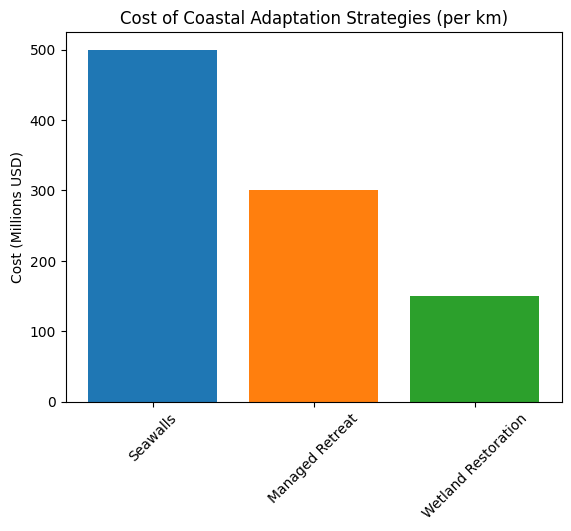

In [ ]:
import matplotlib.pyplot as plt
adaptations = ['Seawalls', 'Managed Retreat', 'Wetland Restoration']
costs = [500, 300, 150]  # Cost per km in millions USD

plt.bar(adaptations, costs, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Cost of Coastal Adaptation Strategies (per km)')
plt.ylabel('Cost (Millions USD)')
plt.xticks(rotation=45)
plt.show()

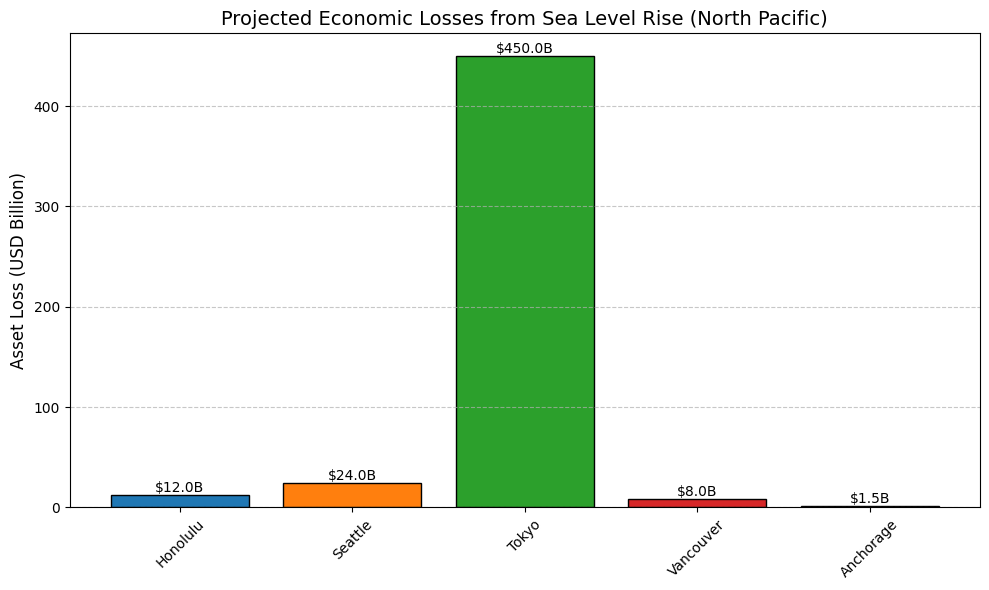

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
cities = ['Honolulu', 'Seattle', 'Tokyo', 'Vancouver', 'Anchorage']
losses = [12, 24, 450, 8, 1.5]  # USD Billion
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(cities, losses, color=colors, edgecolor='black')

# Add values on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height}B', ha='center', va='bottom')

plt.title('Projected Economic Losses from Sea Level Rise (North Pacific)', fontsize=14)
plt.ylabel('Asset Loss (USD Billion)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from tabulate import tabulate

# Create DataFrame
data = {
    "Location": cities,
    "SLR Scenario": ["+0.5m by 2050", "+1.0m by 2100", "+1.5m by 2100", "+0.8m by 2080", "+0.3m by 2050"],
    "Asset Loss (USD B)": losses,
    "GDP Impact (%)": [8, 12, 5, 4, 3]
}
df = pd.DataFrame(data)

# Print as formatted table
print(tabulate(df, headers='keys', tablefmt='pretty', showindex=False))

+-----------+---------------+--------------------+----------------+
| Location  | SLR Scenario  | Asset Loss (USD B) | GDP Impact (%) |
+-----------+---------------+--------------------+----------------+
| Honolulu  | +0.5m by 2050 |        12.0        |       8        |
|  Seattle  | +1.0m by 2100 |        24.0        |       12       |
|   Tokyo   | +1.5m by 2100 |       450.0        |       5        |
| Vancouver | +0.8m by 2080 |        8.0         |       4        |
| Anchorage | +0.3m by 2050 |        1.5         |       3        |
+-----------+---------------+--------------------+----------------+
